Welcome to my fisrt project related to clustering. There I will use TOP-5 of my favourite clustering methods to split the data given in [this](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?resource=download) kaggle project. This dataset is about users' cards and how often do they use payment methods and for what.

In the first place we are going to include libraries and our data in this project:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import matplotlib
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

KeyboardInterrupt: 

In [ ]:
data = pd.read_csv('data.csv')


# DATA DESCRIPTION

This is how our data look like:

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.shape

(8950, 18)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
display(data.nunique()) # the number of unique variables, by default ingnoring NaN

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

# DATA VISUALIZATION

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import plotly.express as px

Identifying the distribution of every column in this dataset:


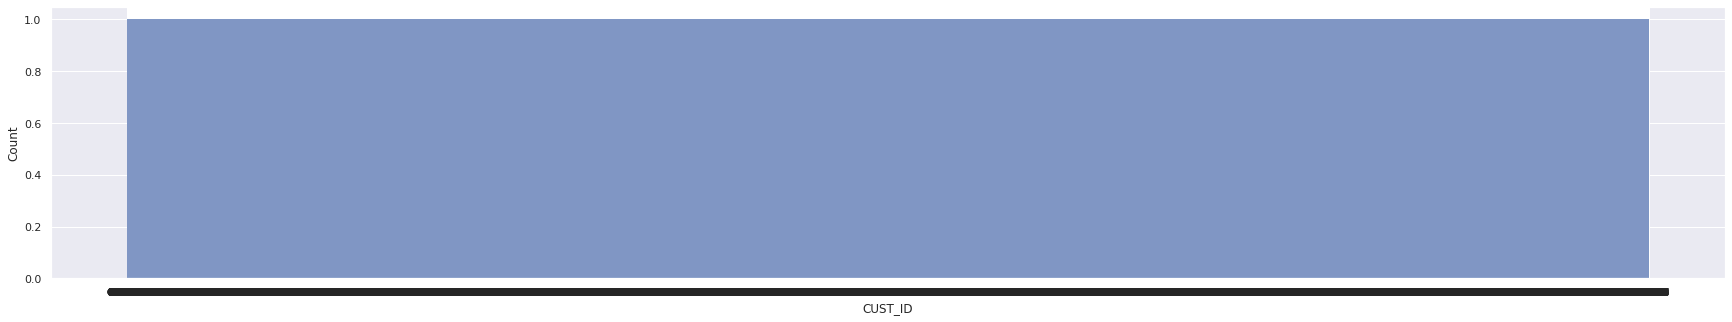

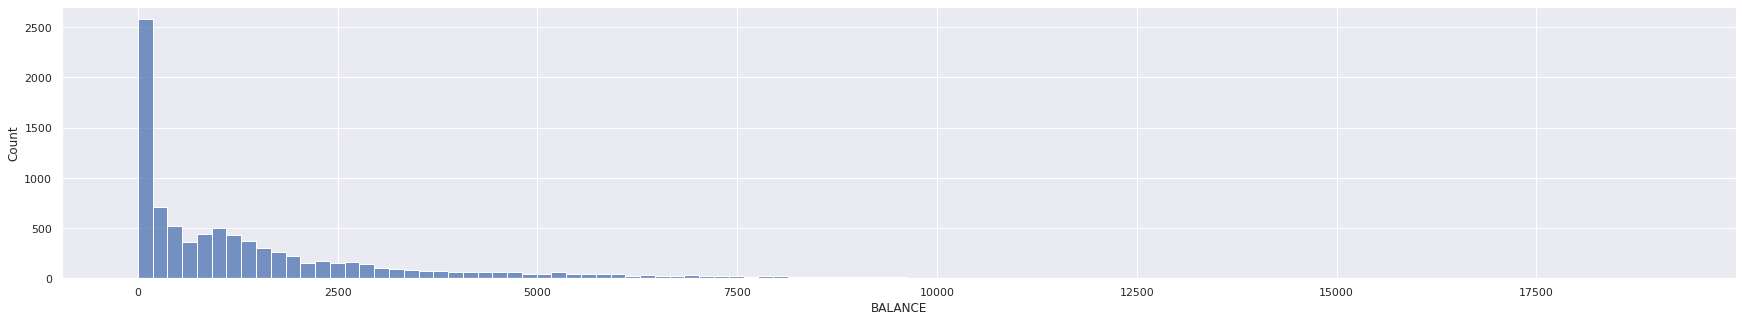

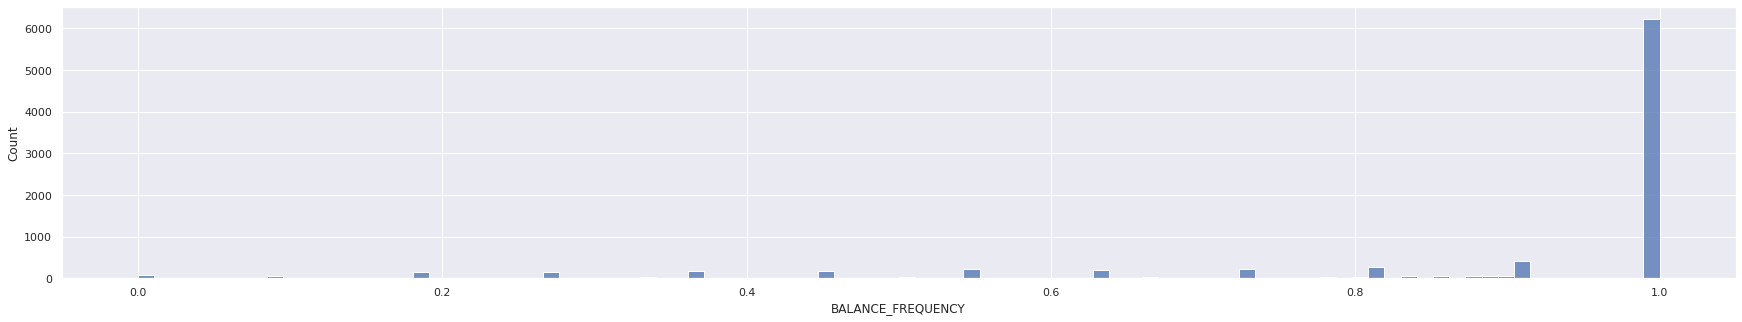

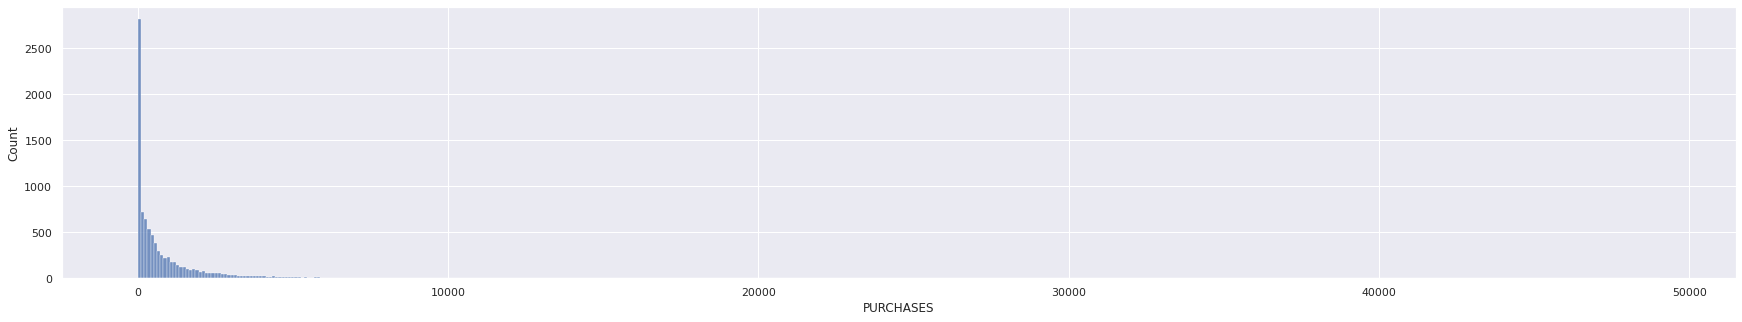

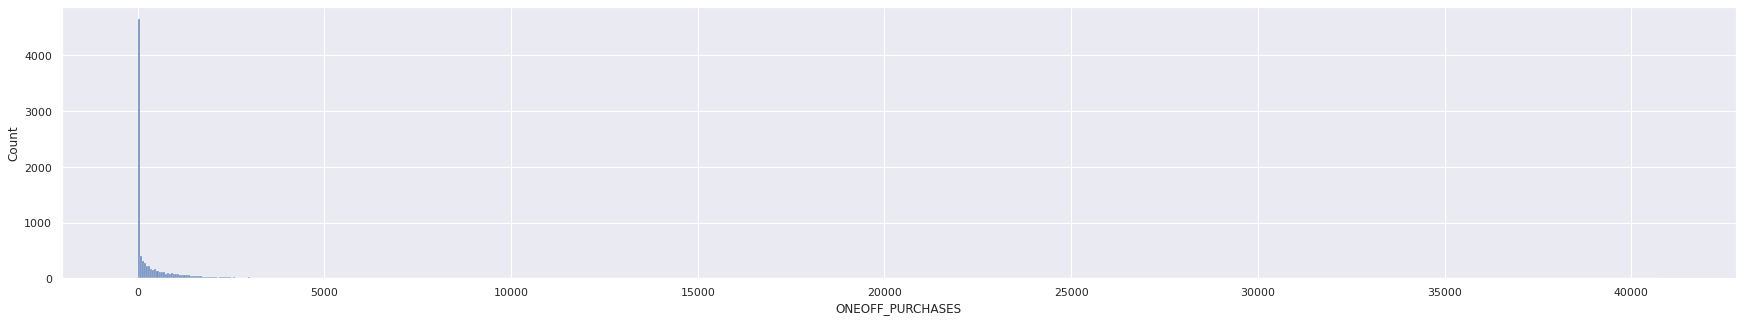

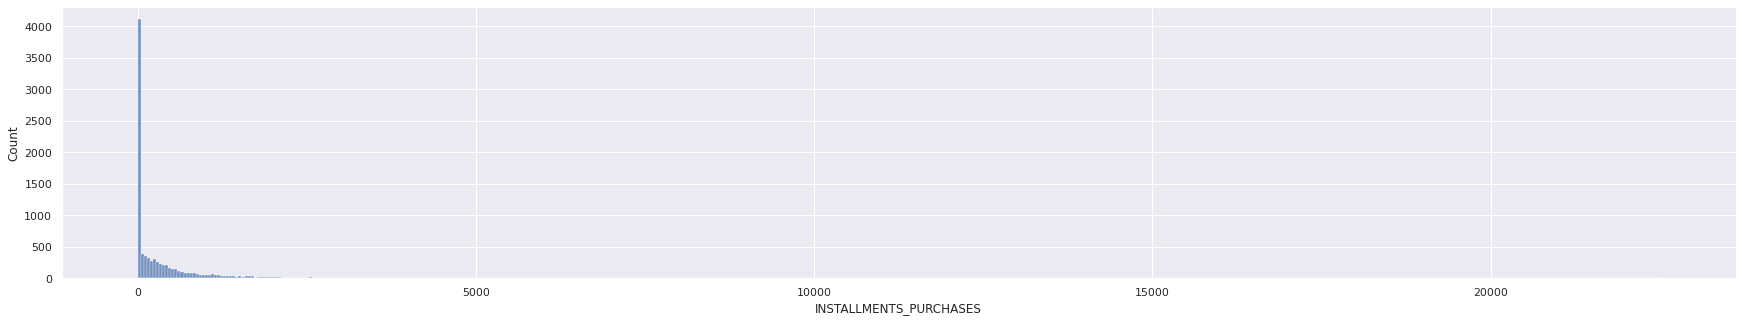

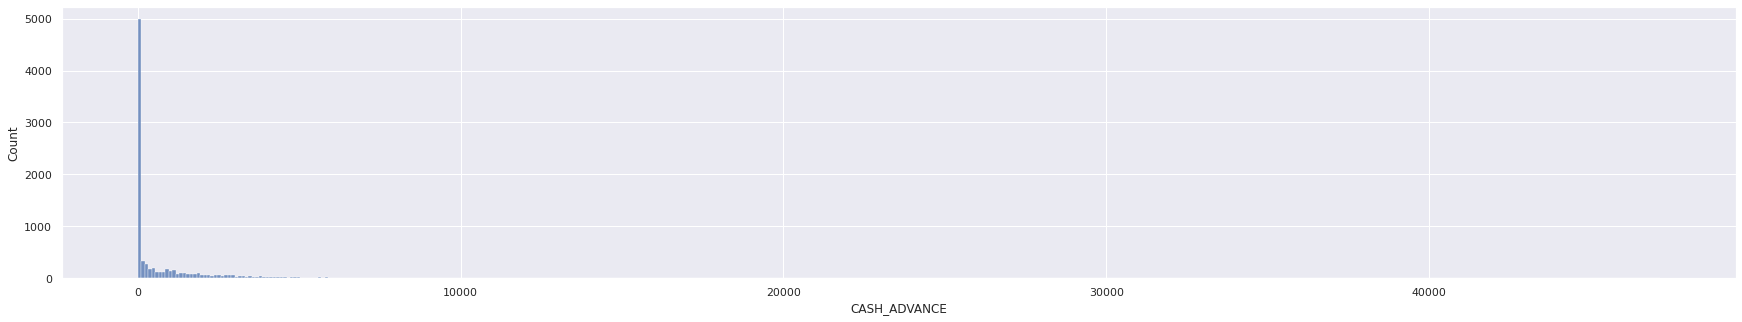

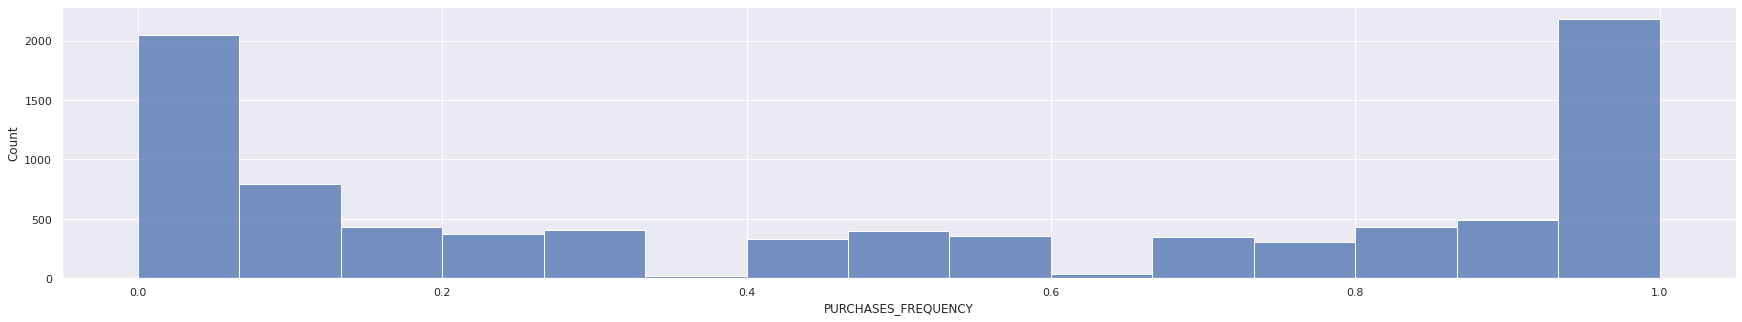

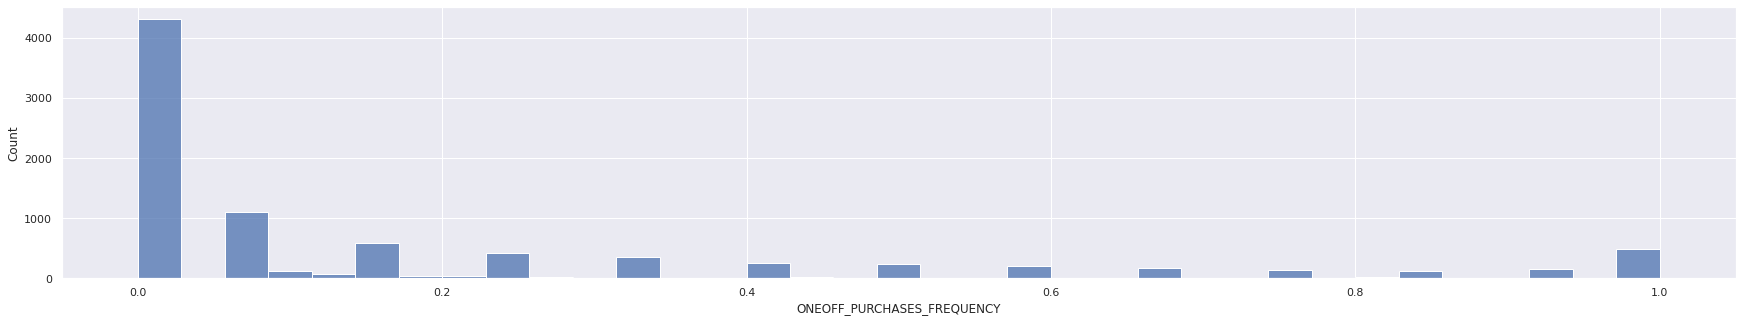

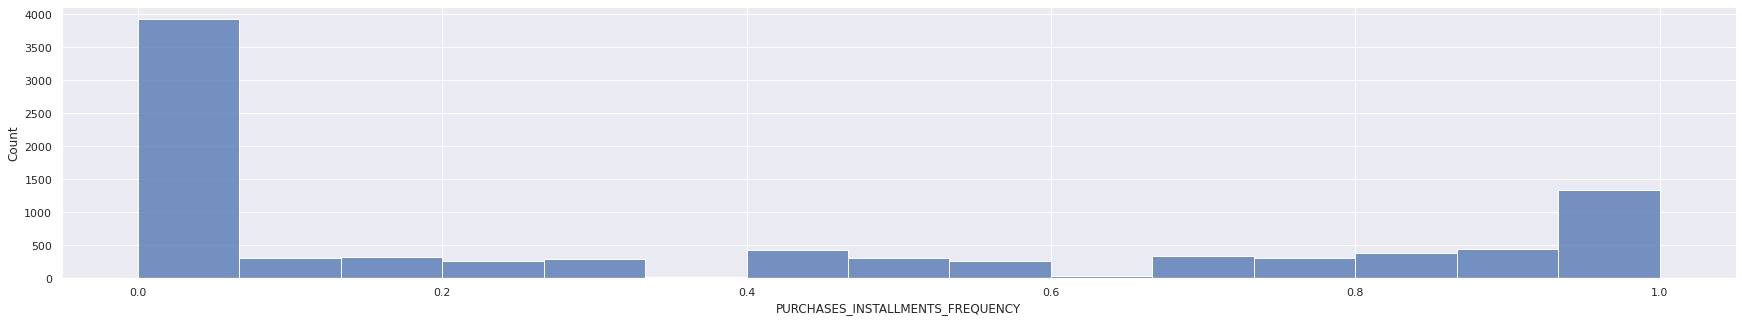

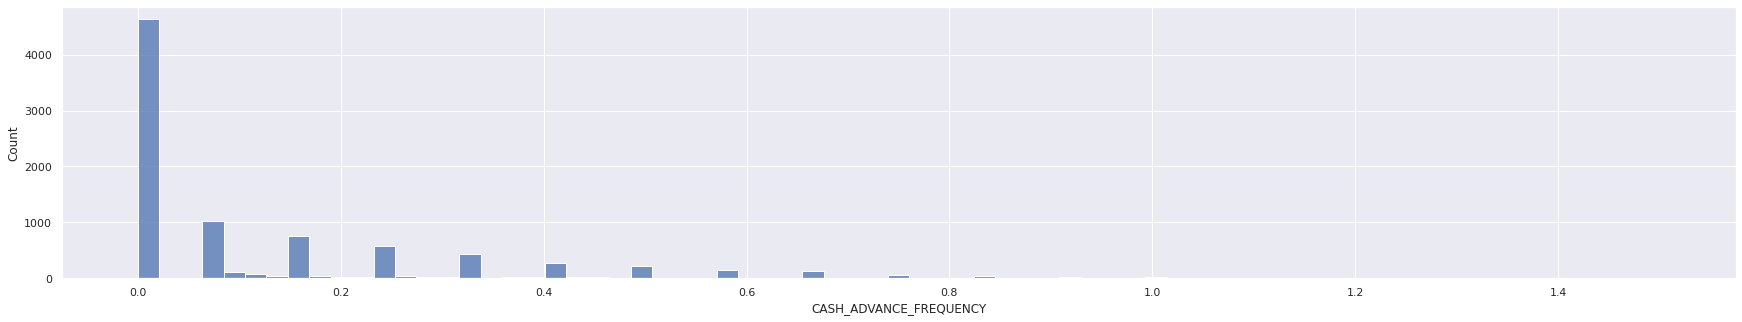

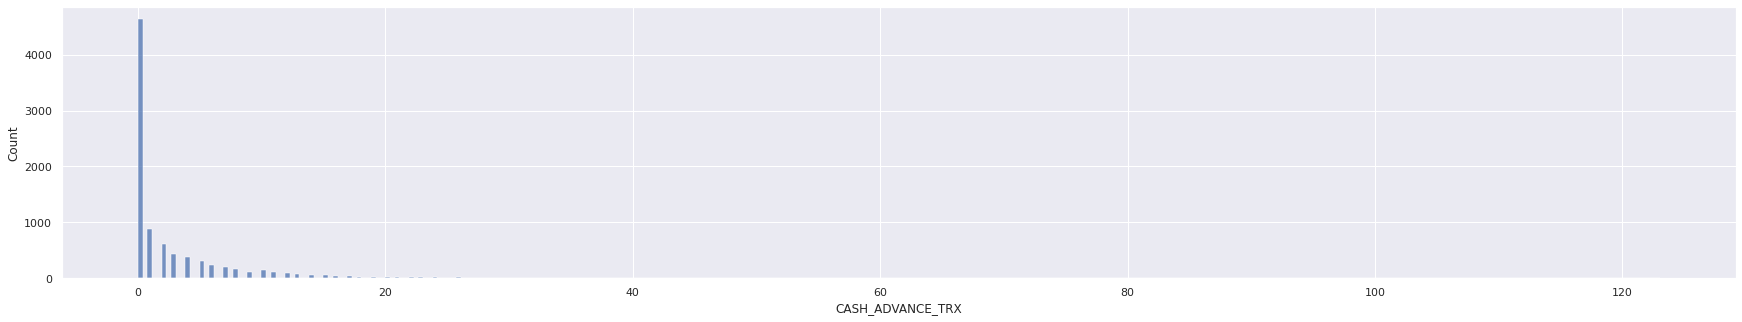

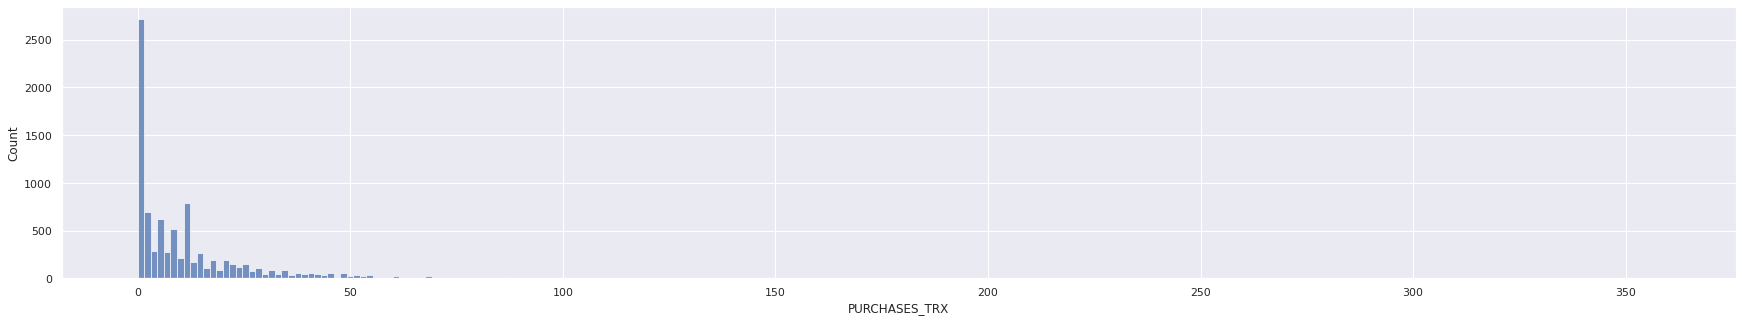

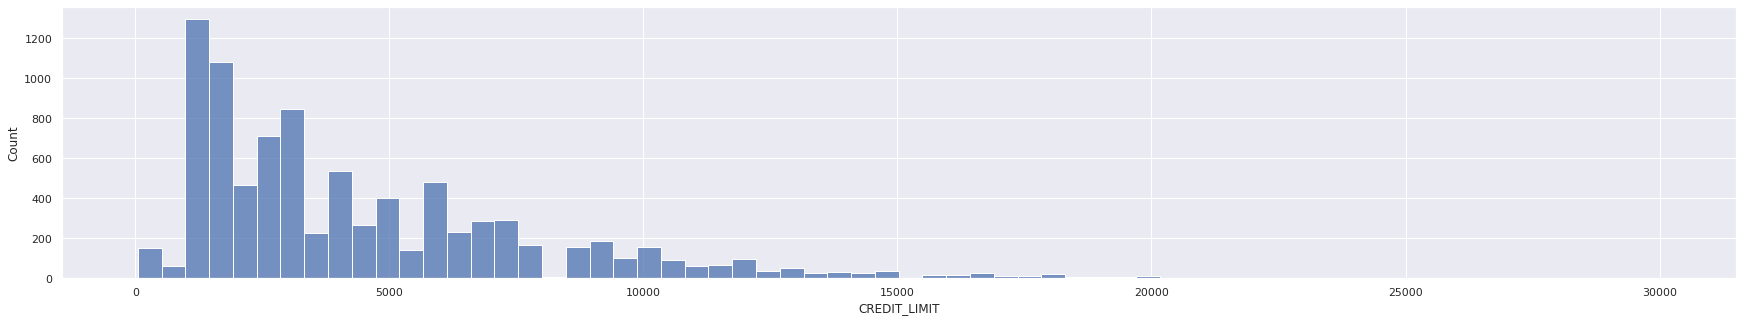

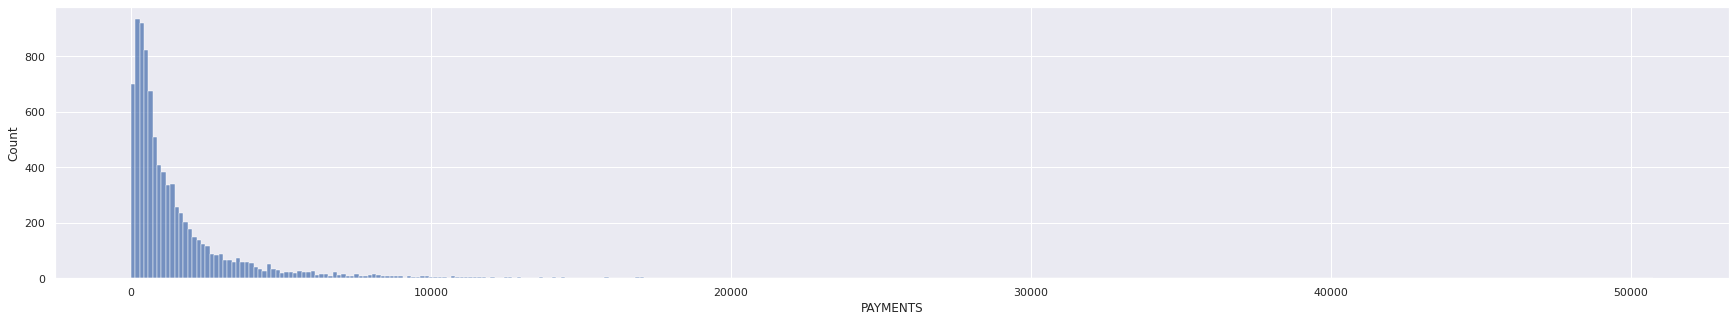

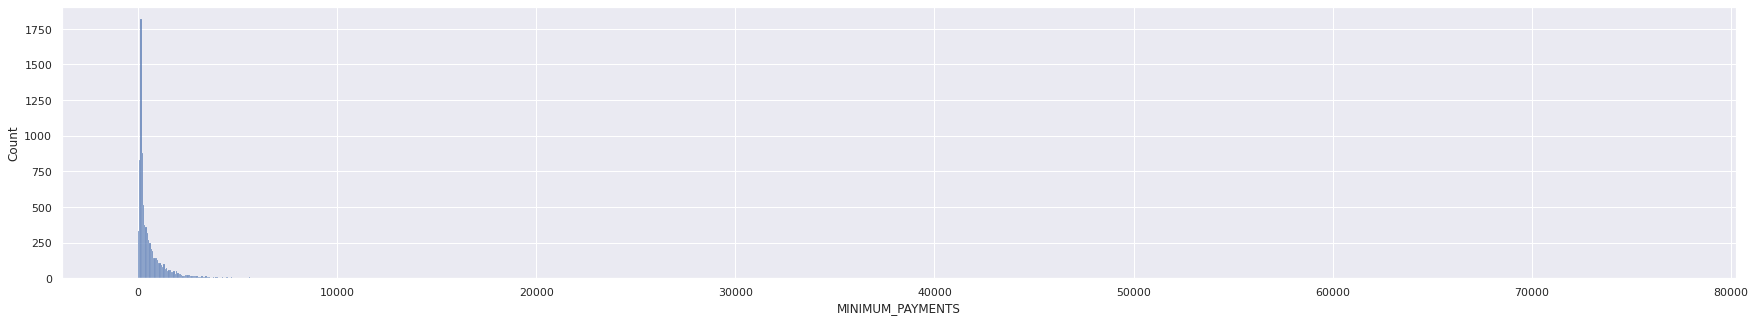

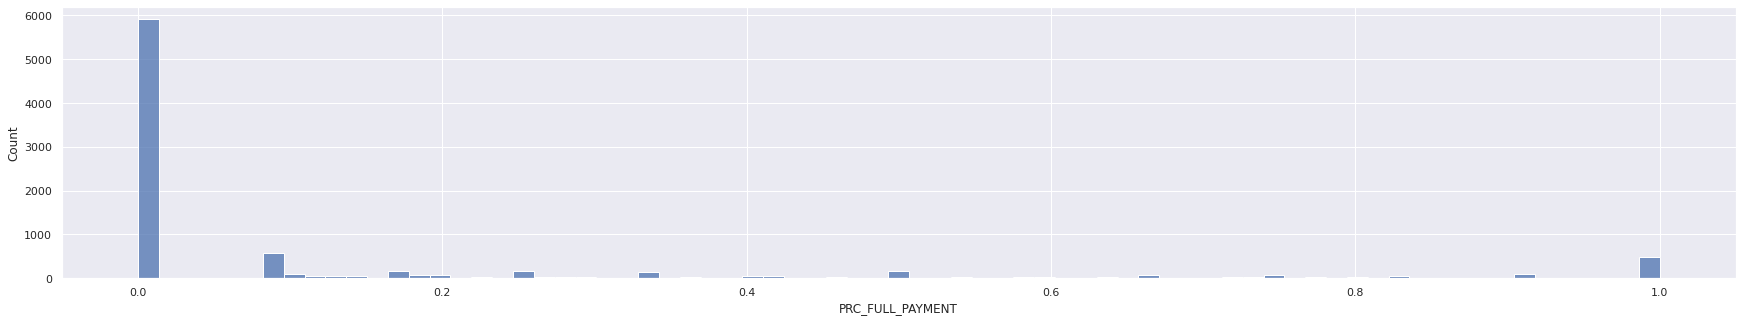

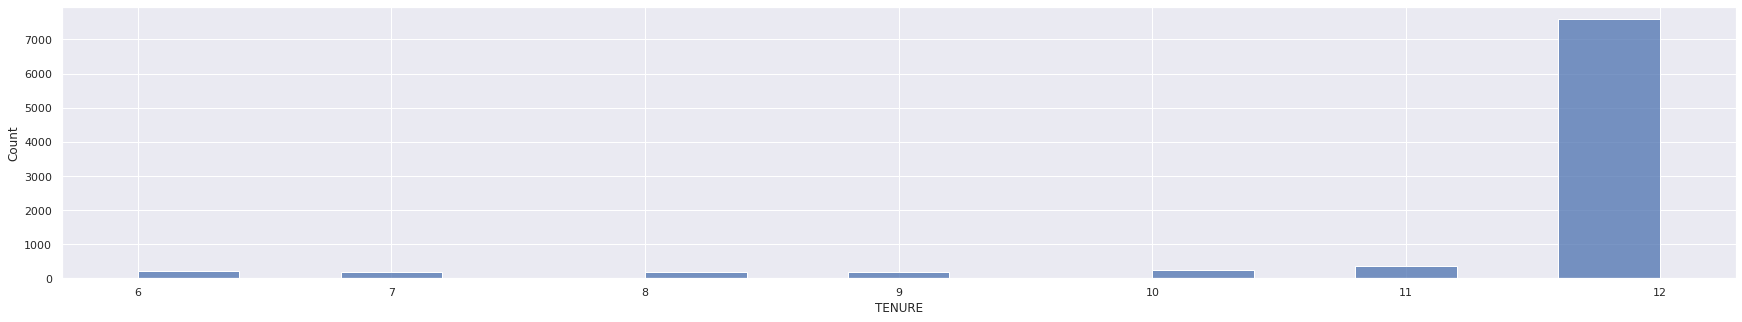

In [ ]:
for column in data.columns:
    plt.figure(figsize = (30,5))
    sns.histplot(data[column])
    plt.show()

In [ ]:
boxes = [go.Box(y=data["BALANCE"], name="BALANCE", boxmean=True), 
          go.Box(y=data["CREDIT_LIMIT"], name="CREDIT_LIMIT", boxmean=True), 
          go.Box(y=data["PAYMENTS"], name="PAYMENTS", boxmean=True), 
          go.Box(y=data["PURCHASES"], name="PURCHASES", boxmean=True), 
          go.Box(y=data["CASH_ADVANCE"], name="CASH_ADVANCE", boxmean=True)]
fig_go = go.Figure(data=boxes)
fig_go.show()



<AxesSubplot:xlabel='PAYMENTS', ylabel='CREDIT_LIMIT'>

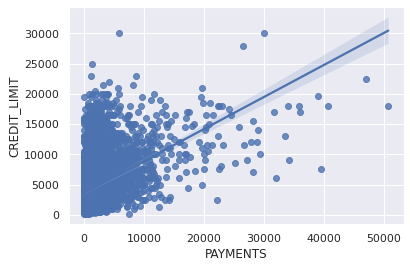

In [ ]:
sns.regplot(data = data, y = data['CREDIT_LIMIT'], x = data['PAYMENTS'])

# PREPROCESSING DATA

As we work with numeric data only and the column "CUST_ID" does not bring any attention worth values, we can drop it:

In [ ]:
data = data.drop('CUST_ID', axis = 1) 

Now we will see how many data we are missing:

In [ ]:
data = data.replace('?', np.nan)
data.isnull().sum(axis=0)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In our case the best way how to get rid of NULL values is to replace them with median ones:

In [ ]:
data["CREDIT_LIMIT"] = data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].median())
data["MINIMUM_PAYMENTS"] = data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].median())

Let's deal with outliers:

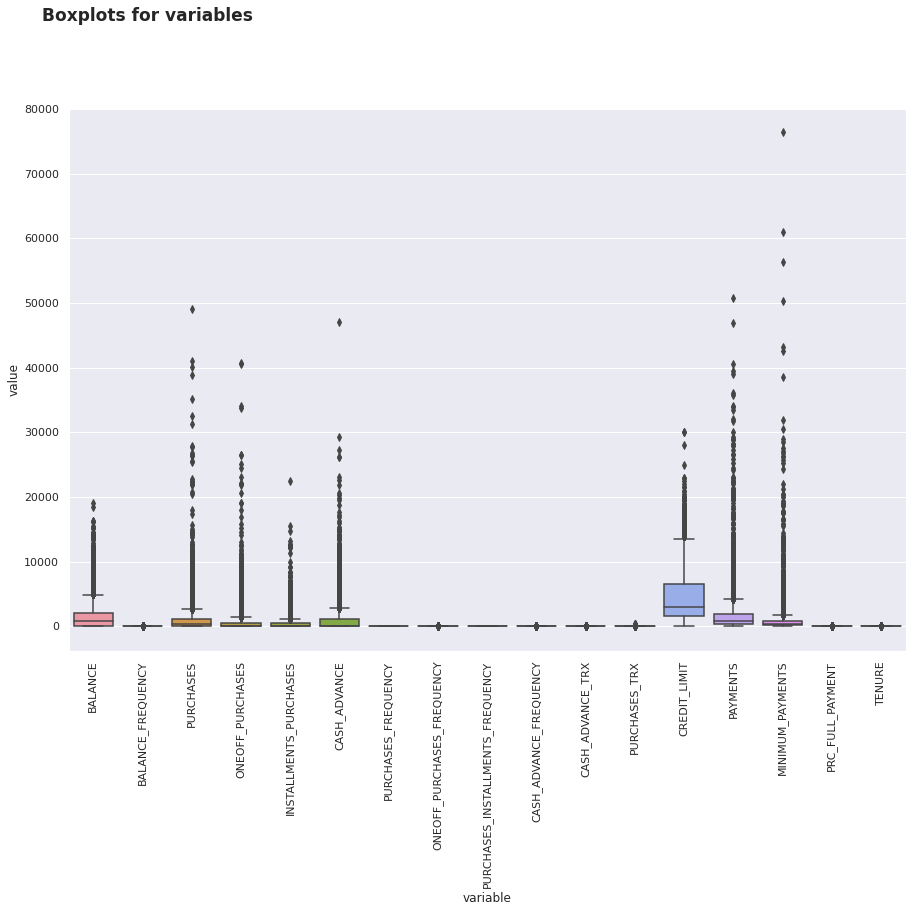

In [ ]:

data_melt = data.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Boxplots for variables", fontsize=17, fontweight='bold')
fg = sns.boxplot(x='variable', y='value', data=data_melt)
fg.set_xticklabels(fg.get_xticklabels(), rotation=90)
plt.show()



I have seen one good option how to determine outliers - Z-Score:

In [ ]:
from scipy import stats
import numpy as np
z_score_out = np.abs(stats.zscore(data))
print(z_score_out)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.731989           0.249434   0.424900          0.356934   
1     0.786961           0.134325   0.469552          0.356934   
2     0.447135           0.518084   0.107668          0.108889   
3     0.049099           1.016953   0.232058          0.546189   
4     0.358775           0.518084   0.462063          0.347294   
...        ...                ...        ...               ...   
8945  0.737950           0.518084   0.333293          0.356934   
8946  0.742423           0.518084   0.329136          0.356934   
8947  0.740398           0.185477   0.401965          0.356934   
8948  0.745174           0.185477   0.469552          0.356934   
8949  0.572575           0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.349079      0.466786             0.806490   
1                   0.454576      2.605605             1.221758   
2     

These data we are going to save:

In [ ]:
print(np.where(z_score_out>3))

(array([   6,   19,   20, ..., 8947, 8948, 8949]), array([ 3, 14, 14, ..., 16, 16, 16]))


In [ ]:
data = data[(z_score_out<3).all(axis=1)]

Now we have a better dataset:

In [ ]:
data.shape

(7434, 17)

The last important thing left is feature scaling:

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# K-means 

K-Means is a a partitioning, not clustering algorithm with these good characteristics: it is fast, easy to understand, and available everywhere. And due to the fact this algorithm splits the dataset into parts, they do not always create usefull clusters.

As the first goal, we need to find the best value for K. Let's consider choosing elbow method:

In [ ]:
from sklearn.cluster import KMeans


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


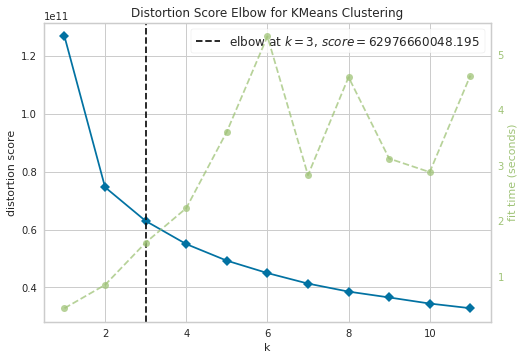

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
vis = KElbowVisualizer(model, k =(1,12))

vis.fit(data)
vis.show()

According to the results above the best value for K is 5. And there is 2D plot after clustering

[3 4 2 ... 0 3 0]
[[-1.96750941  0.13553168]
 [ 4.33270643  1.84166346]
 [ 1.54559243 -0.51314834]
 [-0.52290016 -1.67756299]
 [-2.02417338  3.38241563]]


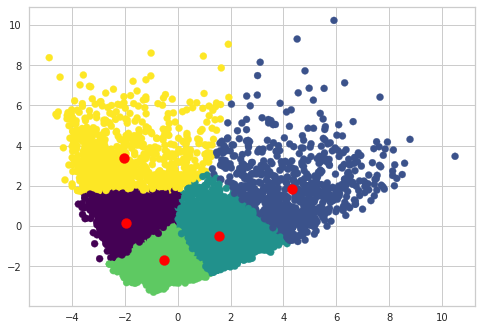

In [ ]:
from sklearn.decomposition import PCA

k = 5

pca = PCA(n_components=2)
data_fit = pca.fit_transform(StandardScaler().fit_transform(data.values))
kmeans = KMeans ( n_clusters = k, random_state = 1).fit(data_fit)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

plt.scatter(data_fit[:,0], data_fit[:,1], c=kmeans.labels_, cmap=plt.cm.viridis)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", s=100)
plt.show()


As a result we have a plot of our data devided into 5 groups by common parameters.

Counter({1: 4942, 0: 1531, 2: 961})


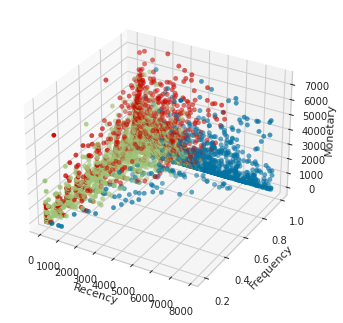

In [ ]:
import collections
dataset = np.array(data)

LABEL_COLOR_MAP = {0 : 'r', 1 : 'g', 2 : 'b', 3 : 'c', 4 : 'm', 5 : 'y', 6 : 'k'}
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print(collections.Counter(kmeans.labels_))
label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]
ax = plt.figure().add_subplot(111, projection='3d')
ax.scatter(dataset[:,0],dataset[:,1],dataset[:,2],color=label_color)
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary")
plt.show()

The were not so brilliant expectations from the ver beginning and in the end we see that "clusters" are quiet close to each other, which is not the result we really wanted to have in clustering project.

# Silhouette method

This method we use to look at the separation distance between the resulting clusters. 
The silhouette plot displays a measure of how close each point in one cluster is to points in the 
neighboring clusters. 
This measure has a range of [-1, 1], where +1 indicates that the sample is far away from the neighboring clusters, 0 indicates that the sample is on or very close and negative - that those samples might have been assigned to the wrong cluster.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
#
# Fit the KMeans model
#
kmeans.fit_predict(data)
#
# Calculate Silhoutte Score
#
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.359


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3,
                                      random_state=40))

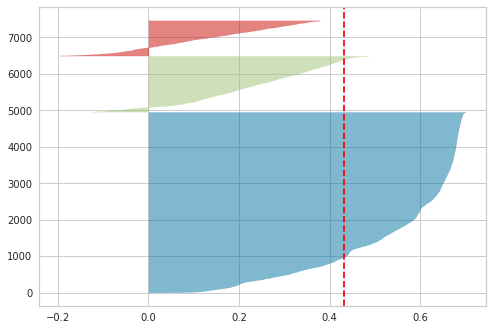

In [ ]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=40)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4,
                                      random_state=40))

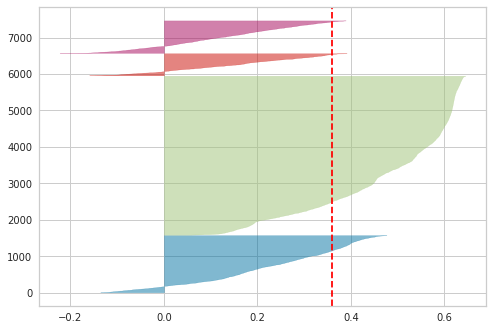

In [ ]:
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=40)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=5,
                                      random_state=40))

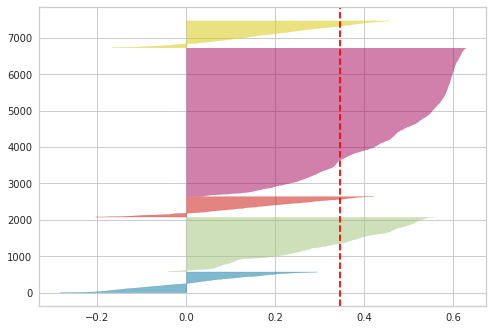

In [ ]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=40)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=6,
                                      random_state=40))

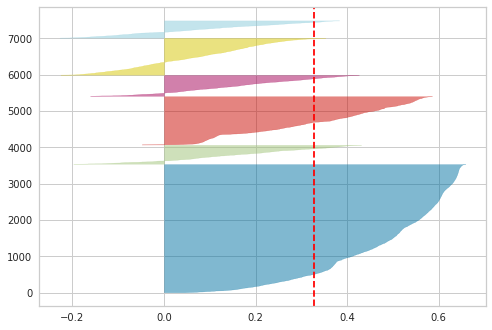

In [ ]:
km = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=100, random_state=40)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=7,
                                      random_state=40))

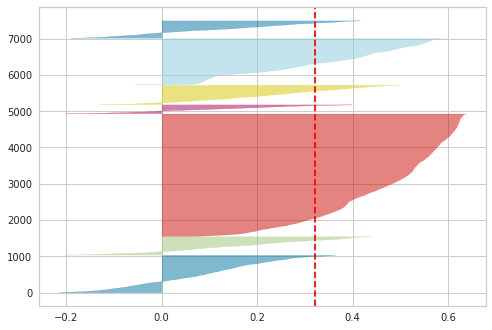

In [ ]:
km = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=100, random_state=40)

visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data)

On every plot we see that a small part of points of almost most of clusters were assigned wrong cause the value is negative which is normal for K-means method. It did not look quiet right in the part of this project above, so, we just see another confirmation towards the fact that this method is not so suitable for clustering.

From my point of view, number of clusters 6 and 7 shows worse results than 4 and 5 due to the fact how thick some labels are in comparison to the others. But clusers number 5 is the most optimal from all of these options and the reason for this conclusion is the balance in it comparing to num. 4.

# HDBSCAN

The HDBSCAN algorithm will classify our data into clusters. The labels are the default output, with -1 representing outliers ( which we almost do not have, at lease have tried to get rid of them ) and labels 0 and above representing clusters.

In [ ]:
import hdbscan

We have a new parameter min_cluster_size which is used to determine whether points are ‘falling out of a cluster’ or splitting to form two new clusters, - as the description says. So, let's tip this value:

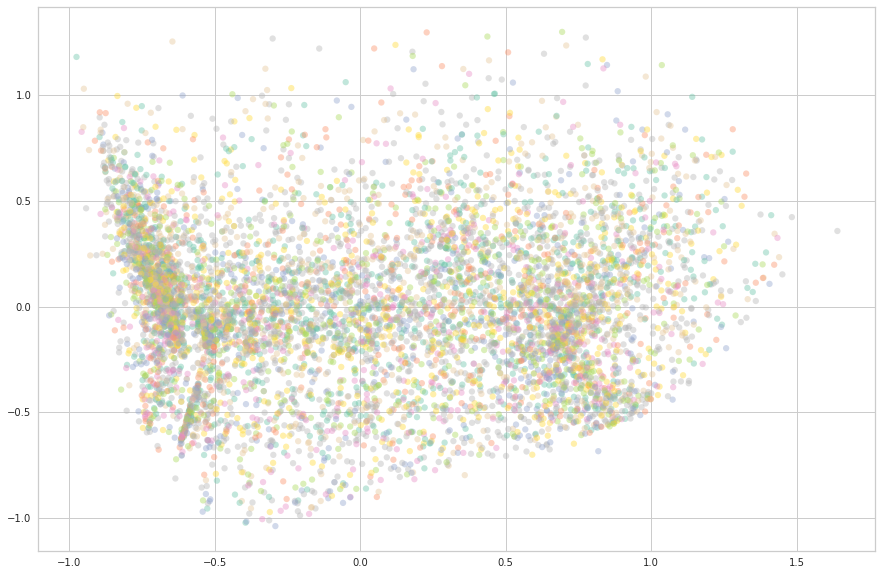

In [ ]:
pca = PCA(n_components=2)
clusterer = hdbscan.HDBSCAN(min_cluster_size=50).fit(data)
data_fit = pca.fit_transform(MinMaxScaler().fit_transform(data.values))


x = np.linspace(0, 10, 7434)
y = np.sin(x)

plt.rcParams["figure.figsize"] = (15,10)
plt.scatter(data_fit[:,0], data_fit[:,1], s=40, linewidth=0,c=y, cmap='Set2', alpha=0.4)
plt.show()

<AxesSubplot:ylabel='$\\lambda$ value'>

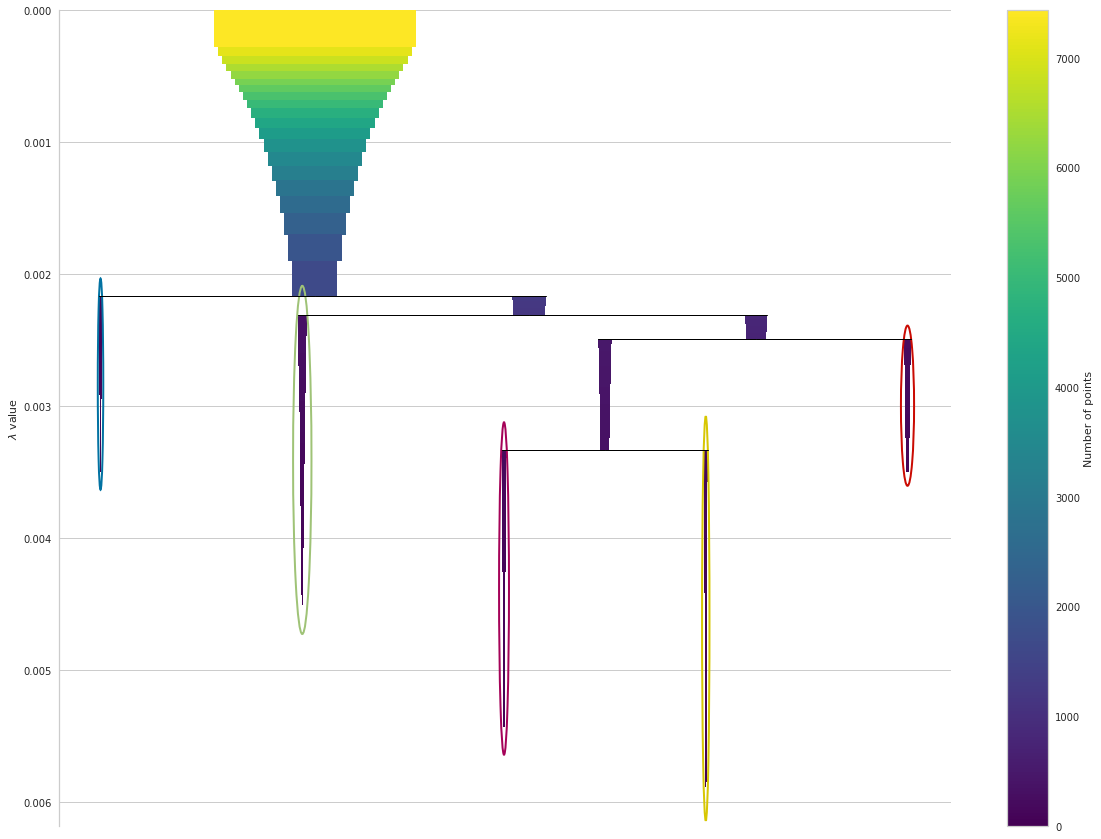

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=50).fit(data)
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

The hdbscan algorithm is supposed to devide data into clusters much better than K-means method, but because of poor quality on the first plot we barely see these clusters. If you look at the other plot, right above this message, you will see how good, almost perfectly hdbscan has done its job. This dataset is not a nice example to classify data, but still the hdbscan show best results in comparison with the methods above. The main problem there is guessing which paramater value should we use, cause this is the only thing we can influence on.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b38ffe52-2224-4a2c-b36b-0c88483f27c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>